In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/Customer_Churn.csv')
print(data)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

## Exploratory Data Analysis

In [117]:
print(data.head(5))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [118]:
print(data.tail(10))

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7033  9767-FFLEM    Male              0      No         No      38   
7034  0639-TSIQW  Female              0      No         No      67   
7035  8456-QDAVC    Male              0      No         No      19   
7036  7750-EYXWZ  Female              0      No         No      12   
7037  2569-WGERO  Female              0      No         No      72   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
7033          Yes                No     Fiber optic                   No  ...   
7034          Yes               Yes     Fiber optic                

In [119]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [120]:
data.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [121]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [122]:
data.value_counts()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
0002-ORFBO  Female  0              Yes      Yes         9       Yes           No                DSL              No                   Yes                  No                   Yes                  Yes                  No                   One year        Yes               Mailed check               65.60           593.3         No       1
6616-AALSR  Female  0              Yes      Yes         65      Yes           Yes               Fiber optic      Yes                  No                   Yes                  No                   Yes                  Yes                  Two year        Yes               Credit card (automatic)    104.30          6725.3 

In [123]:
churn_counts = data['Churn'].value_counts()
print(churn_counts)

No     5174
Yes    1869
Name: Churn, dtype: int64


In [124]:
data['MonthlyCharges'].mean()

64.76169246059918

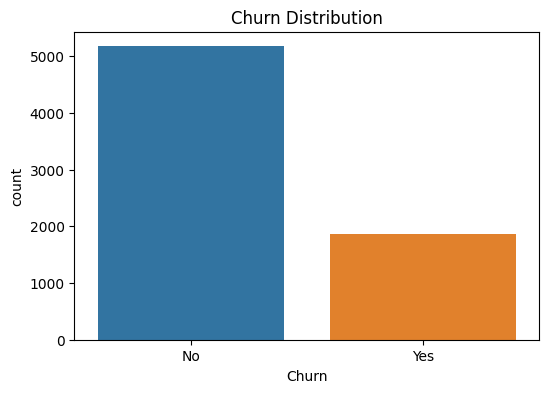

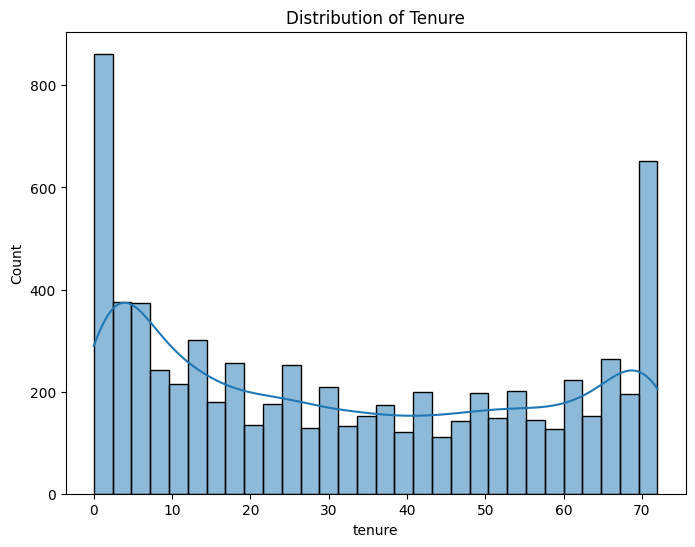

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

# Example: Distribution of 'tenure'
plt.figure(figsize=(8, 6))
sns.histplot(data['tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.show()


<ipython-input-126-a2751f34c6bc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


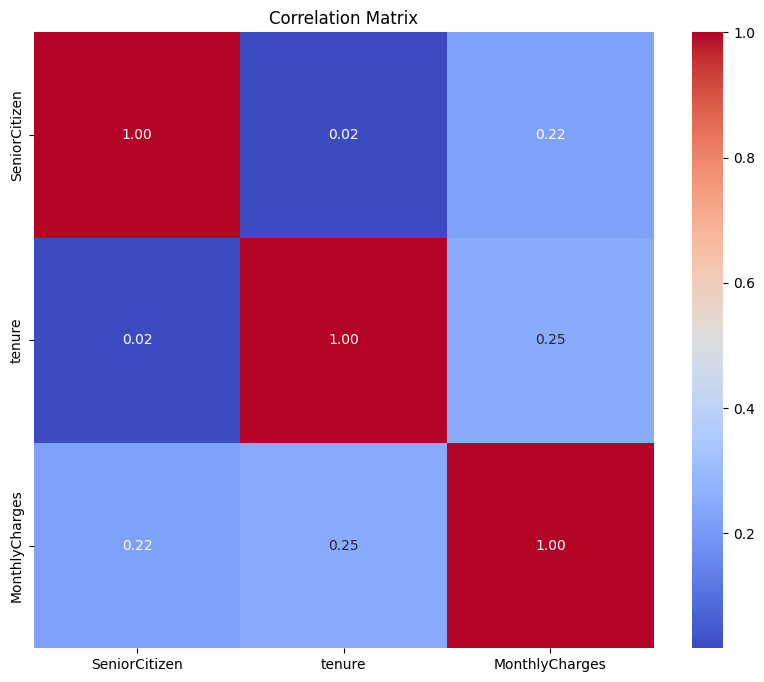

In [126]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

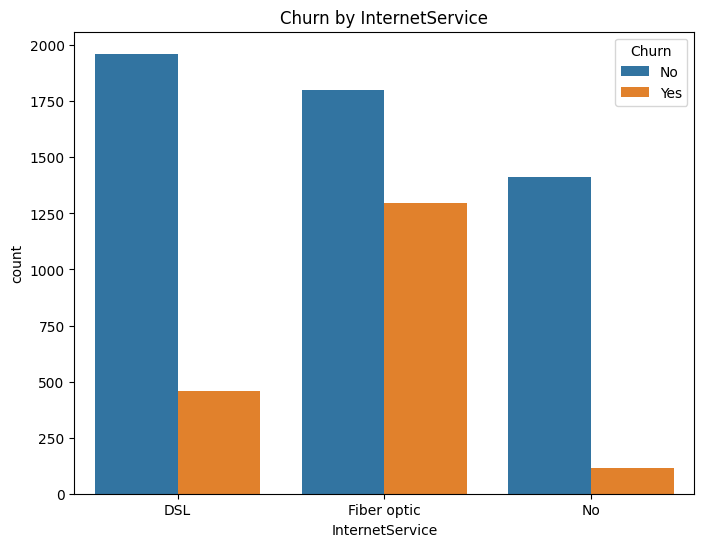

In [127]:
# Example: Churn by InternetService
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title('Churn by InternetService')
plt.show()

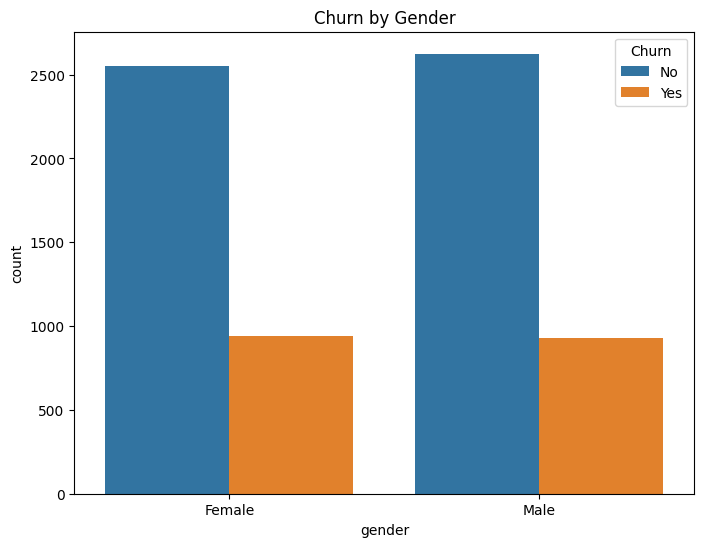

In [128]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=data)
plt.title('Churn by Gender')
plt.show()


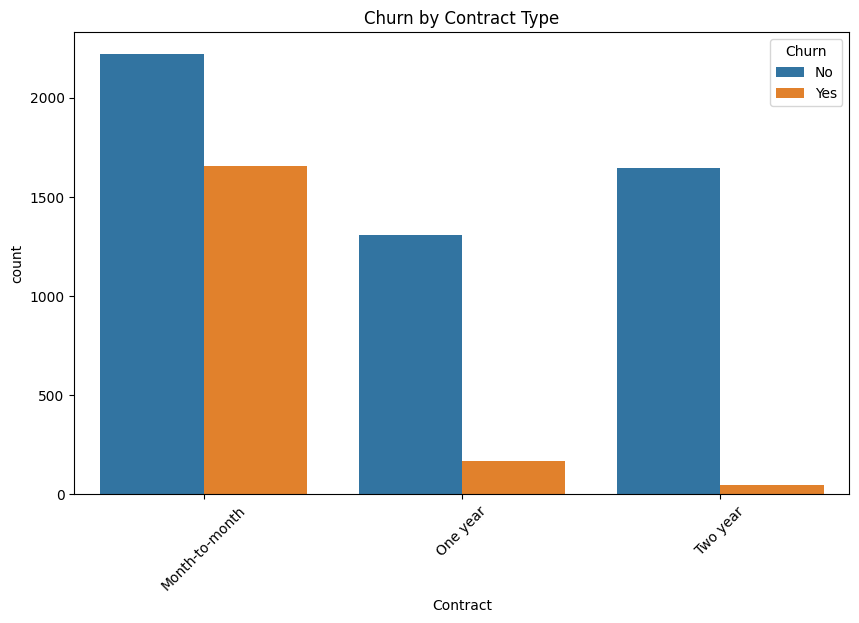

In [129]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn by Contract Type')
plt.xticks(rotation=45)
plt.show()


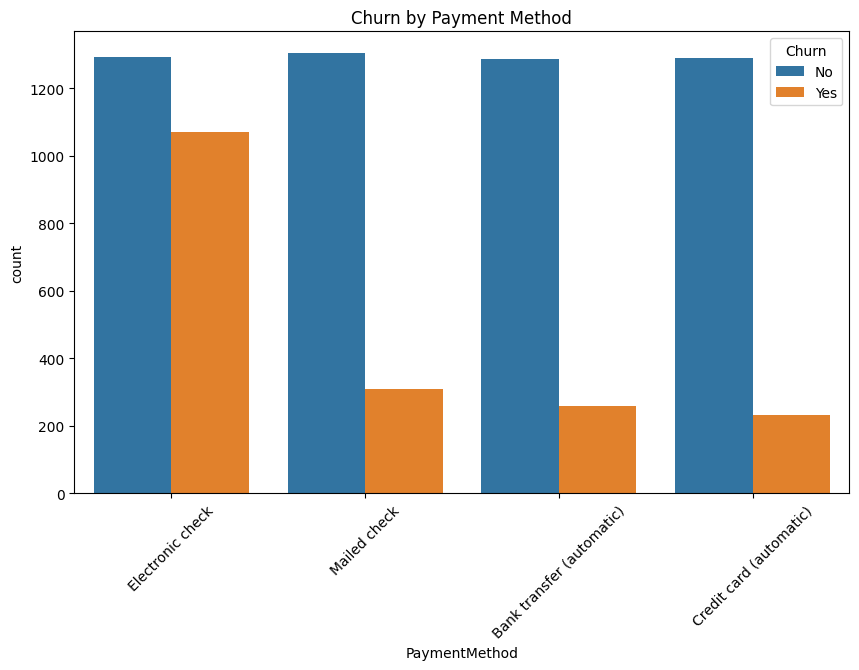

In [130]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()


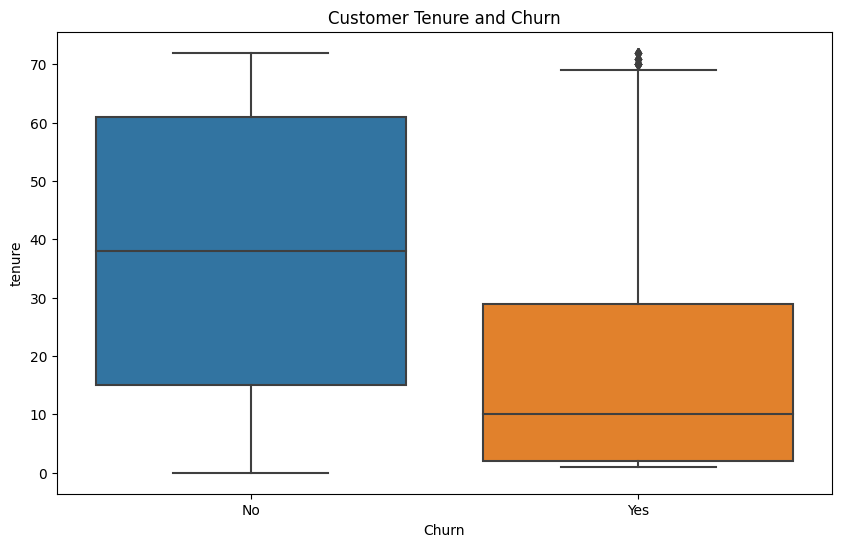

In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Customer Tenure and Churn')
plt.show()


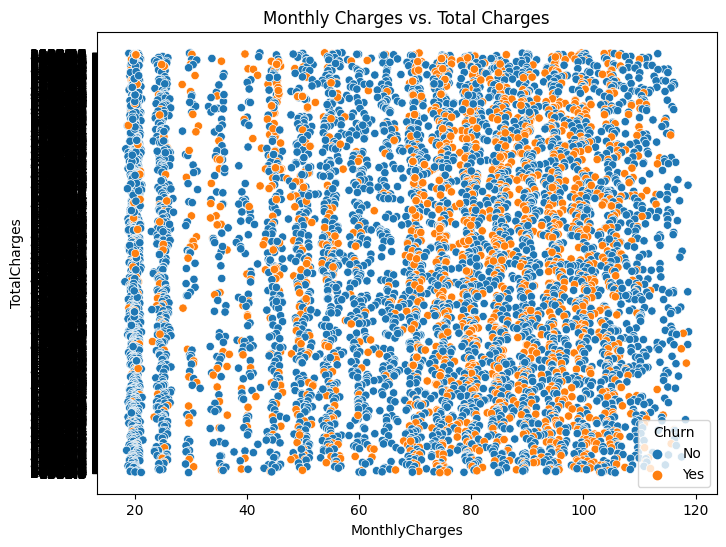

In [132]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=data)
plt.title('Monthly Charges vs. Total Charges')
plt.show()


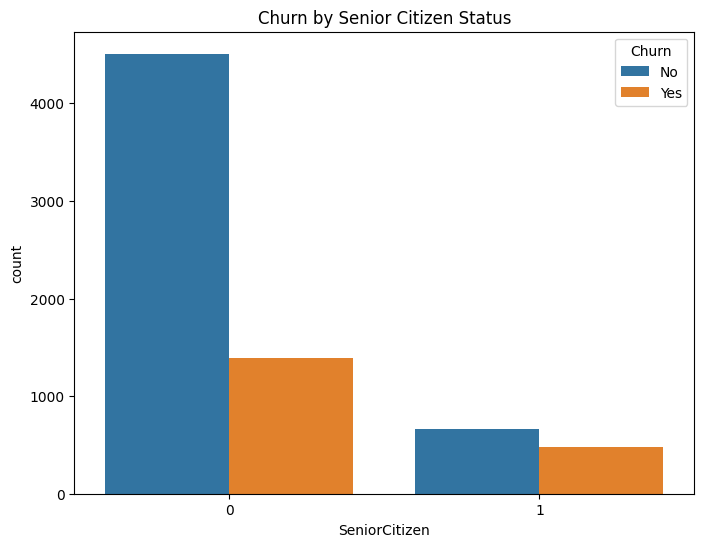

In [133]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=data)
plt.title('Churn by Senior Citizen Status')
plt.show()


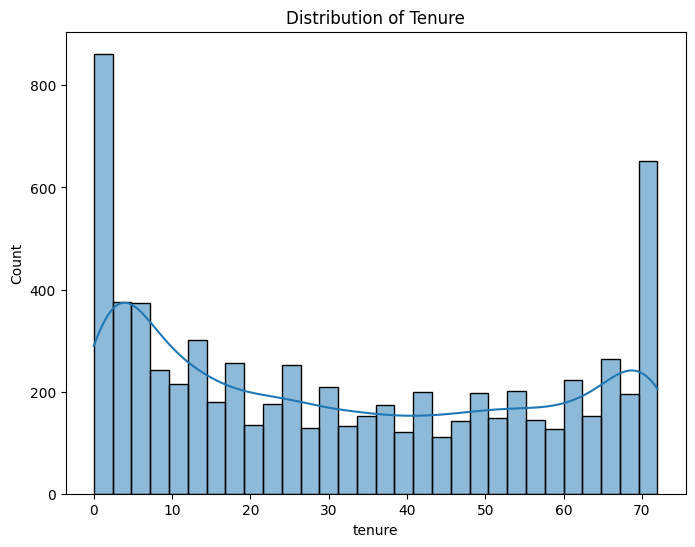

In [134]:
plt.figure(figsize=(8, 6))
sns.histplot(data['tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.show()


In [135]:
type(data)

pandas.core.frame.DataFrame

In [136]:
data_types = data.dtypes

print(data_types)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


## Feature Engineering

In [137]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(0, inplace=True)

In [138]:
# Encode categorical variables
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

## Splitting label & Feature

In [139]:
# Split the data into features and target variable
X = data.drop(['customerID', 'Churn'], axis=1)
y = data['Churn']

In [140]:
print(X)
print(y)
print(len(X))
print(len(y))

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

## Split Test & Train Data

In [141]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(5634, 19)
(1409, 19)
(1409,)
(5634,)


In [142]:
# Feature scaling (optional but often improves model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)

[[-1.02516569e+00 -4.37749204e-01 -9.69578591e-01 ...  1.33926673e+00
  -4.73723375e-04 -4.19924521e-01]
 [-1.02516569e+00 -4.37749204e-01 -9.69578591e-01 ... -1.47094882e+00
   1.07475386e+00  1.25601669e+00]
 [ 9.75452077e-01 -4.37749204e-01  1.03137591e+00 ...  4.02528212e-01
  -1.37649913e+00 -1.00028321e+00]
 ...
 [ 9.75452077e-01 -4.37749204e-01  1.03137591e+00 ...  4.02528212e-01
  -1.45294499e+00 -8.75404569e-01]
 [ 9.75452077e-01  2.28441306e+00 -9.69578591e-01 ...  4.02528212e-01
   1.14953785e+00 -4.80309046e-01]
 [ 9.75452077e-01 -4.37749204e-01 -9.69578591e-01 ... -5.34210304e-01
  -1.49781538e+00 -8.08568424e-01]]
[[-1.02516569 -0.4377492   1.03137591 ...  0.40252821 -1.33162874
  -0.99968666]
 [ 0.97545208 -0.4377492  -0.96957859 ... -1.47094882 -1.31667194
  -0.57032242]
 [-1.02516569 -0.4377492   1.03137591 ...  1.33926673 -1.51277218
  -0.55474573]
 ...
 [ 0.97545208 -0.4377492   1.03137591 ... -1.47094882 -1.49449165
  -0.86493173]
 [-1.02516569 -0.4377492   1.031375

## Model Training

In [143]:
# Train a machine learning model (Random Forest in this example)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

## Model Accuracy

In [144]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7955997161107168
Confusion Matrix:
 [[945  91]
 [197 176]]
Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.91      0.87      1036
         Yes       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



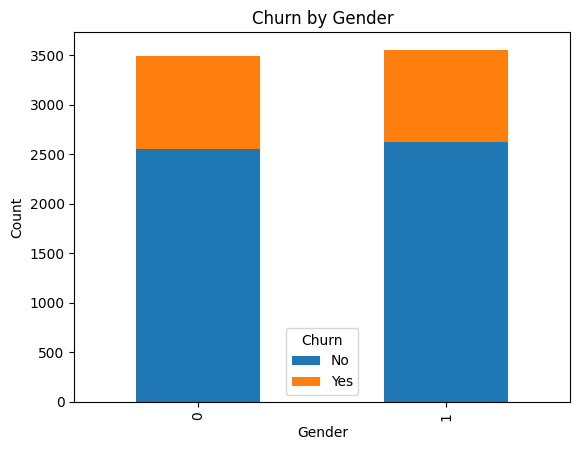

In [145]:
# Example: Churn vs. Gender
data.groupby('gender')['Churn'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

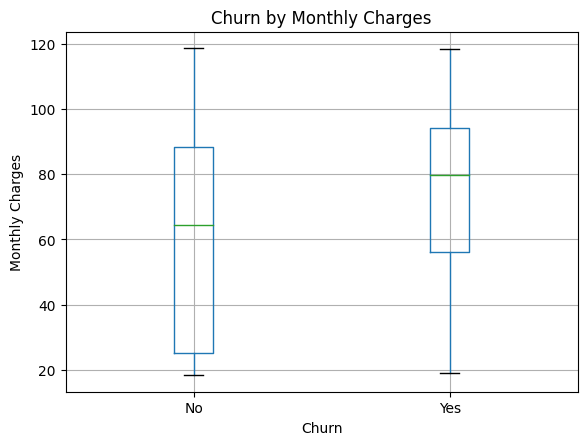

In [146]:
# Example: Churn vs. MonthlyCharges
data.boxplot(column='MonthlyCharges', by='Churn', showfliers=False)
plt.title('Churn by Monthly Charges')
plt.suptitle("")  # Remove the default title
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


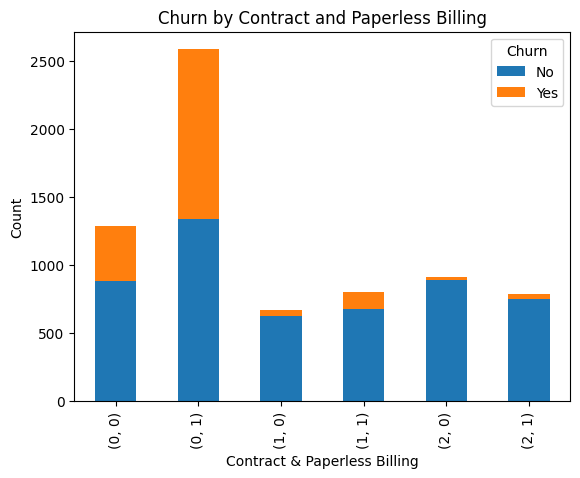

In [147]:
# Example: Churn vs. Contract and PaperlessBilling
data.groupby(['Contract', 'PaperlessBilling'])['Churn'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Churn by Contract and Paperless Billing')
plt.xlabel('Contract & Paperless Billing')
plt.ylabel('Count')
plt.show()


In [148]:
# Create a dictionary with input parameters
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 12,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'DSL',
    'OnlineSecurity': 'Yes',
    'OnlineBackup': 'No',
    'DeviceProtection': 'Yes',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 50.0,
    'TotalCharges': 600.0
}

# Convert the input data to a DataFrame
input_df = pd.DataFrame(input_data, index=[0])

# Apply data preprocessing (encoding)
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Create LabelEncoder instances for each categorical feature and apply them to the input data
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    input_df[col] = le.fit_transform(input_df[col])
    label_encoders[col] = le

# Use the trained model to make predictions
prediction = model.predict(input_df)

print("Churn Prediction:", prediction[0])


Churn Prediction: No


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
